In [1]:
import numpy as np

In [8]:
n = 10
R = np.random.rand(n)
Q1 = 0

In [11]:
alpha = 0.1

def update_q(alpha,n,R):
    q_next = (1-alpha)**n*Q1

    for i in range(n):
        q_next += alpha*(1-alpha)**(n-1)*R[i]
        
    return q_next


In [12]:
update_q(alpha,n,R)

np.float64(0.2672509667770481)

# 定数ステップ法
非定常問題を扱うための代表的な方法が、**定数ステップサイズ α ** を用いた更新式です。これにより、直近の報酬により大きな重みを与えることが可能になります。

$$
Q_{n+1} = Q_{n}+\alpha(R_{n}-Q_{n})
=(1-\alpha)^{n}Q_{1} + \sum_{i=1}^{n}\alpha(1-\alpha)^{n-i}R{_i}

$$


# pythonでの実装例

In [13]:
def calculate_q(alpha,Q1,rewards):
    """
    定数ステップサイズ法に基づく Q_{n+1} の計算
    alpha: ステップサイズ (0 < alpha <= 1)
    Q1: 初期値 Q1
    rewards: 過去の報酬リスト
    """
    n = len(rewards)
    Q_n = (1-alpha)**n * Q1

    for i in range(n):
        Q_n += alpha*(1-alpha)**(n-i-1)*rewards[i]

    return Q_n 


In [14]:
# サンプルデータ
alpha = 0.1
Q1 = 0  # 初期の行動価値
rewards = [-1, 1, -2, 2, 0]  # 過去の報酬

Q_n_plus_1 = calculate_q(alpha, Q1, rewards)
print(f"Q_n+1: {Q_n_plus_1}")

Q_n+1: 0.025290000000000007


# Bandit 

In [18]:
def bandit(action,true_values):
    """指定されたアクションに対して報酬を返す"""
    return np.random.normal(true_values[action],1)


# 定数ステップサイズを用いたバンディットアルゴリズム
def constant_step_size_bandit(k,epsilon,alpha,steps,true_values):
    Q = np.zeros(k)
    rewards=[]

    for _ in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(Q)

        reward = bandit(action,true_values)

        Q[action] += alpha*(reward-Q[action])

        rewards.append(reward)
    return Q,rewards

In [29]:
# 実行例
k = 10  # アームの数
epsilon = 0.1  # 探索率
alpha1 = 0.01  # ステップサイズ
alpha2 = 0.1  # ステップサイズ
alpha3 = 0.2  # ステップサイズ
steps = 1000  # 試行回数
true_values = np.random.normal(0, 1, k)  # 各アームの真の価値

_, rewards1 = constant_step_size_bandit(k, epsilon, alpha1, steps, true_values)
_, rewards2 = constant_step_size_bandit(k, epsilon, alpha2, steps, true_values)
_, rewards3 = constant_step_size_bandit(k, epsilon, alpha3, steps, true_values)

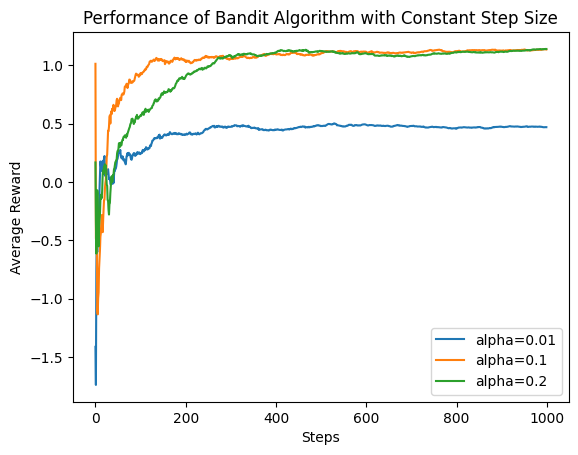

In [30]:
# 平均報酬をプロット
import matplotlib.pyplot as plt
plt.plot(np.cumsum(rewards1) / np.arange(1, steps + 1),label="alpha=0.01")
plt.plot(np.cumsum(rewards2) / np.arange(1, steps + 1),label="alpha=0.1")
plt.plot(np.cumsum(rewards3) / np.arange(1, steps + 1),label="alpha=0.2")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Performance of Bandit Algorithm with Constant Step Size")
plt.legend()
plt.show()